# Assignment 1
This jupyter notebook is meant to be used in conjunction with the full questions in the assignment pdf.

## Instructions
- Write your code and analyses in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of the other cells.

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>.ipynb` and submit ONLY the notebook file on moodle.

### Environment setup

The following code reads the train and test data (provided along with this template) and outputs the data and labels as numpy arrays. Use these variables in your code.

---
#### Note on conventions
In mathematical notation, the convention is tha data matrices are column-indexed, which means that a input data $x$ has shape $[d, n]$, where $d$ is the number of dimensions and $n$ is the number of data points, respectively.

Programming languages have a slightly different convention. Data matrices are of shape $[n, d]$. This has the benefit of being able to access the ith data point as a simple `data[i]`.

What this means is that you need to be careful about your handling of matrix dimensions. For example, while the covariance matrix (of shape $[d,d]$) for input data $x$ is calculated as $(x-u)(x-u)^T$, while programming you would do $(x-u)^T(x-u)$ to get the correct output shapes.

In [3]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

def read_data(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    
    num_points = len(lines)
    dim_points = 28 * 28
    data = np.empty((num_points, dim_points))
    labels = np.empty(num_points)
    
    for ind, line in enumerate(lines):
        num = line.split(',')
        labels[ind] = int(num[0])
        data[ind] = [ int(x) for x in num[1:] ]
        
    return (data, labels)

train_data, train_labels = read_data("sample_train.csv")
test_data, test_labels = read_data("sample_test.csv")
print(train_data.shape, test_data.shape)
print(train_labels.shape, test_labels.shape)

(6000, 784) (1000, 784)
(6000,) (1000,)


# Questions
---
## 1.3.1 Representation
The next code cells, when run, should plot the eigen value spectrum of the covariance matrices corresponding to the mentioned samples. Normalize the eigen value spectrum and only show the first 100 values.

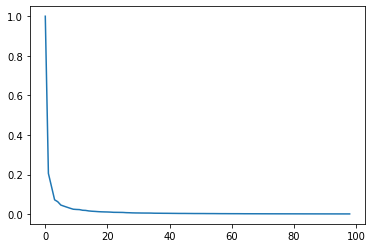

In [4]:
# %matplotlib inline
b = np.where(train_labels==7)
samples = [train_data[b]]
cov = np.cov(samples[0])

evals, evecs = np.linalg.eigh(cov)
idx = evals.argsort()[::-1]
evals = evals[idx]
evals = evals[0:99]
evals = evals/evals[0]
evecs = evecs[:,idx]
plt.plot(evals)
plt.show()

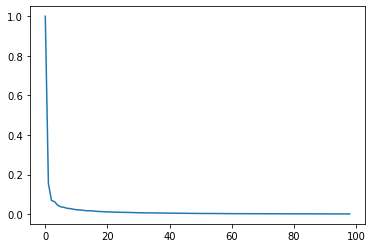

In [5]:
# Samples corresponding to the last digit of (your roll number + 1) % 10 (plot b)
from copy import deepcopy

b = np.where(train_labels==8)
samples = [train_data[b]]
cov = np.cov(samples[0])
evals, evecs = np.linalg.eigh(cov)
idx = evals.argsort()[::-1]
evals = evals[idx]
evals = evals[0:99]
evals = evals/evals[0]
evecs = evecs[:,idx]
plt.plot(evals)
plt.show()

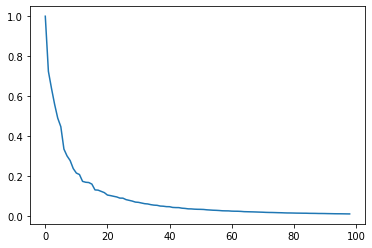

In [6]:
# All training data (plot c)

samples = deepcopy(train_data.T)
cov = np.cov(samples)
evals, evecs = np.linalg.eigh(cov)
idx = evals.argsort()[::-1]
evals = evals[idx]
evals = evals[0:99]
evals = evals/evals[0]
evecs = evecs[:,idx]
plt.plot(evals)
plt.show()

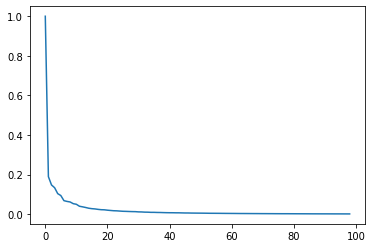

In [7]:
# Randomly selected 50% of the training data (plot d)
import random

samples = deepcopy(train_data)
random.shuffle(samples.T)
samples = samples[0:2999]

        
cov = np.cov(samples)
evals, evecs = np.linalg.eigh(cov)
idx = evals.argsort()[::-1]
evals = evals[idx]
evals = evals[0:99]
evals = evals/evals[0]
evecs = evecs[:,idx]
plt.plot(evals)
plt.show()

### 1.3.1 Question 1
- Are plots a and b different? Why?
- Are plots b and c different? Why?
- What are the approximate ranks of each plot?

---
> ### Answer 1
> 1. Yes,the plots of a and b are different. This is because different labels correspond to different data, which results in their differing eigenspectrum.
> 2. Yes, the plots of b and c are different, because the plot c contains the eigenspectrum of the entire data, which is a superset of the data for part b(in my case corresponding to label=8).
> 3. Plot a --> 30 <br>
   Plot b --> 40 <br>
   Plot c --> 80 <br>
   Plot d --> 45 <br>
---

### 1.3.1 Question 2
- How many possible images could there be?
- What percentage is accessible to us as MNIST data?
- If we had acces to all the data, how would the eigen value spectrum of the covariance matrix look?

---
> ### Answer 2
> 1. We can have a total number of $2<sup>784</sup>$ images. With simple combinatronics, we can see that for each pixel in the $784x784 image$, either $0$ or $1$.
> 2. We have accessibility to $7000$ images, which gives us a percentage of (70002/2<sup>784</sup> x 100)%.
> 3. If we have access to the  entire data, it is the most symmetrical scenario. Hence the covariance of all dimensions will be same, and hence the eigenvalues and eigenvectors will be the same. So the eigenspectrum will be a straight line(horizontal or vertical, depending upon the projection axes).
---

## 1.3.2 Linear Transformation
---
### 1.3.2 Question 1
How does the eigen spectrum change if the original data was multiplied by an orthonormal matrix? Answer analytically and then also validate experimentally.

---
> ### Answer 1
> Multiplication by an orthonormal matrix is a kind of covariant transformation. It basically rotates the entire data. Hence the eigenvalues will not change as the orientation of the data has rotated, and the eigenvectors will shift to a different basis. The relative shift of data towards each eigenvector (which is what the eigenvalues represent) will remain the same, hence the eigenvalues will not change.

---

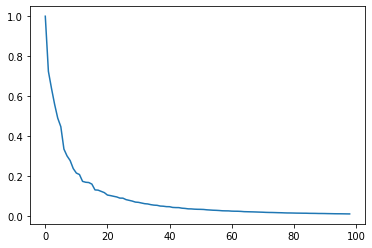

In [8]:
# Experimental validation here.
# Multiply your data (train_data) with an orthonormal matrix and plot the
# eigen value specturm of the new covariance matrix.

# code goes here
# from scipy.stats import ortho_group
# m = ortho_group.rvs(dim=784)
# using svd decomposition as scipy library is not allowed
# approach taken from Stack Overflow
dim = 784
H = np.random.rand(dim, dim)
u, s, vh = np.linalg.svd(H, full_matrices=False)
mat = u @ vh 
# print(mat @ mat.T)

samples = deepcopy(train_data)
samples = samples.dot(mat)
samples = samples.T

cov = np.cov(samples)
evals, evecs = np.linalg.eigh(cov)
idx = evals.argsort()[::-1]
evals = evals[idx]
evals = evals[0:99]
evals = evals/evals[0]
evecs = evecs[:,idx]
plt.plot(evals)
plt.show()

### 1.3.2 Question 2
If  samples  were  multiplied  by  784 × 784  matrix  of rank 1 or 2, (rank deficient matrices), how will the eigen spectrum look like?

---
>### Answer 2
>Since the rank of the $784 × 784$ matrix can be $1$ or $2$, thus depending on it the eigen spectrum will just be $1$ or $2$ eigenvalues (rest all will be zero). This is because on multiplication of 2 matrices, the rank function applies as<br>
> $rank(A × B) = rank(A) × rank(B)$.

---

### 1.3.2 Question 3
Project the original data into the first and second eigenvectors and plot in 2D

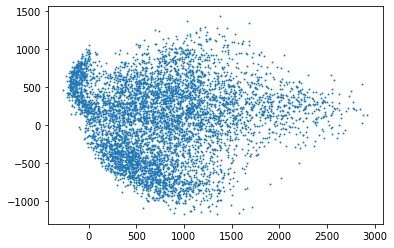

In [9]:
# Plotting code here

samples = deepcopy(train_data)
cov = np.cov(train_data.T)
evals, evecs = np.linalg.eig(cov)
idx = evals.argsort()[::-1]
idx = idx[:2]
evecs1 = evecs[:,idx]

samples = samples.dot(evecs1)
samples = samples.real
plt.scatter(samples[:,0], samples[:,1], s=0.8)
plt.show()

## 1.3.3 Probabilistic View
---
In this section you will classify the test set by fitting multivariate gaussians on the train set, with different choices for decision boundaries. On running, your code should print the accuracy on your test set.

In [10]:
# Print accuracy on the test set using MLE
dim = 30
samples = deepcopy(train_data)
samples2 = deepcopy(test_data)
cov = np.cov(train_data.T)
evals, evecs = np.linalg.eig(cov)
evecs1 = np.real(evecs[:,evals.argsort()[::-1][:dim]])

samples = samples.dot(evecs1) #projected training data to dim=30 dimensions 
samples2 = samples2.dot(evecs1) #projected testing data to dim=30 dimensions

b = []
for i in range(10):
    b.append(np.where(train_labels==i))
    
mn = [[], [], [], [], [], [], [], [], [], []]
cv = deepcopy(mn)
for i in range(10):
    mn[i] = np.mean(samples[b[i]], axis = 0)
for i in range(10):
    cv[i] = np.cov(samples[b[i]].T)

mat = np.zeros((10, samples2.shape[0]))
# print(len(mat[0]))
for i in range(10):
    num = np.dot((samples2 - mn[i]), np.linalg.inv(cv[i]))
    num = np.dot(num, (samples2-mn[i]).T)
    mat[i] = np.diagonal(num)/2 + np.log(np.linalg.det(cv[i]))
    
mat = np.argmin(mat, axis=0)
cnt = np.where(test_labels==mat)
cnt = len(cnt[0])
print("Accuracy using MLE method =", cnt/10, "(taking dim = 30)")

Accuracy using MLE method = 94.3 (taking dim = 30)


In [11]:
# Print accuracy on the test set using MAP
# (assume a reasonable prior and mention it in the comments)
dim = 30
apriori = [0.13, 0.05, 0.25, 0.05, 0.05, 0.05, 0.05, 0.1, 0.15, 0.12]

mn = [[], [], [], [], [], [], [], [], [], []]
cv = deepcopy(mn)
b = []

for i in range(10):
    b.append(np.where(train_labels==i))
for i in range(10):
    mn[i] = np.mean(samples[b[i]], axis = 0)
    cv[i] = np.cov(samples[b[i]].T)
# print(cv)

mat = np.zeros((10, 1000))

for i in range(10):
    num = np.dot((samples2 - mn[i]), np.linalg.inv(cv[i]))
    num = np.dot(num, (samples2-mn[i]).T)
    mat[i] = np.diagonal(num)/2 + np.log(np.linalg.det(cv[i])) - np.log(apriori[i])
    
mat = np.argmin(mat, axis=0)
# print(mat.shape)
cnt = np.where(test_labels==mat)
cnt = len(cnt[0])
print("Accuracy using MAP method =", cnt/10, "(taking dim = 30)")

Accuracy using MAP method = 94.4 (taking dim = 30)


In [12]:
# Print accuracy using Bayesian pairwise majority voting method

b = []
for i in range(10):
    b.append(np.where(train_labels==i))
    
mn = [[], [], [], [], [], [], [], [], [], []]
cv = deepcopy(mn)
for i in range(10):
    mn[i] = np.mean(samples[b[i]], axis = 0)
for i in range(10):
    cv[i] = np.cov(samples[b[i]].T)

mat = np.zeros((10, samples2.shape[0]))
# print(len(mat[0]))
# mat2 = np.zeros((10, samples2.shape[0]))

for i in range(10):
    for j in range(i,10):
        num1 = np.dot((samples2 - mn[i]), np.linalg.inv((cv[i]+cv[j])/2))
        num1 = np.dot(num1, (samples2-mn[i]).T)
        num1 = np.diagonal(num1)
        
        num2 = np.dot((samples2 - mn[j]), np.linalg.inv((cv[i]+cv[j])/2))
        num2 = np.dot(num2, (samples2-mn[j]).T)
        num2 = np.diagonal(num2)

        mat[i] += np.where(num1 - num2 > 0, 0, 1)
        mat[j] += np.where(num1 - num2 > 0, 1, 0)
    
mat = np.argmax(mat, axis=0)
cnt = np.sum(np.where(test_labels==mat,1,0))
# cnt = len(cnt[0])
print("Accuracy using Bayesian pairwise majority voting method =", cnt/10, "(taking dim = 30)")

Accuracy using Bayesian pairwise majority voting method = 88.4 (taking dim = 30)


In [13]:
# Print accuracy using Simple Perpendicular Bisector majority voting method
b = []
for i in range(10):
    b.append(np.where(train_labels==i))
    
mn = [[], [], [], [], [], [], [], [], [], []]
cv = deepcopy(mn)
for i in range(10):
    mn[i] = np.mean(samples[b[i]], axis = 0)
for i in range(10):
    cv[i] = np.cov(samples[b[i]].T)

mat = np.zeros((10, samples2.shape[0]))

for i in range(10):
    for j in range(i+1, 10):
        num1 = np.sum(np.power(samples2 - mn[i],2), axis=1)
        num2 = np.sum(np.power(samples2 - mn[j],2), axis=1)

        mat[i] += np.where(num1 - num2 > 0, 0, 1)
        mat[j] += np.where(num1 - num2 > 0, 1, 0)
        
mat = np.argmax(mat, axis=0)
cnt = np.sum(np.where(test_labels==mat,1,0))

print("Accuracy using Simple Perpendicular Bisector majority voting method =", cnt/10, "(taking dim = 30)") 


Accuracy using Simple Perpendicular Bisector majority voting method = 75.3 (taking dim = 30)


### 1.3.3 Question 4
Compare performances and salient observations

---
> ### Answer 4
Accuracy with different classifiers:
> $MLE$                    : $94.3$ <br>
> $MAP$                    : $94.4$ <br>
> $Bayesian\ Voting$        : $88.4$ <br>
> $Perpendicular\ Bisector$ : $75.3$ <br>
> - We get the highest accuracy with $MLE$ because we take the covariance matrix into complete account and take the $mahalonobis distance$ to compute the distance from the classification boundary.
- $MAP$ gives lower accuracy because the test data is assumed to be Gaussian with data distributed on the normal random variable class index. Since the data is not gaussian in reality, the accuracy is less. 
- $Bayesian\ Voting$ compares the covariance matrices leading to loss of information reducing accuracy. 
- $L2 norm$(Perpendicular distance) is a poor distance measure when covariance matrices are not equal, which is the case with practical data.

> There is only a slight difference in the formulas for $MLE$ and $MAP$ methods, as in the $MAP$ method, there is an extra term of $log(P(x))$, where $P(x)$ is the probability distribution for each label taken at random (I took $P(x)= [0.13, 0.05, 0.25, 0.05, 0.05, 0.05, 0.05, 0.1, 0.15, 0.12]$)
---

## 1.3.4 Nearest Neighbour based Tasks and Design
---
### 1.3.4 Question 1 : NN Classification with various K
Implement a KNN classifier and print accuracies on the test set with K=1,3,7

In [14]:
# Your code here
# Print accuracies with K = 1, 3, 7
import copy

def knn_distances(train, test):
    dist_vec = np.sum(train**2,axis=1) + np.sum(test**2, axis=1)[:, np.newaxis] -2 * np.dot(test, train.T)
    return dist_vec

dist = knn_distances(train_data, test_data)
# len(dist)
def classify(k):
    right = 0
    for i in range(dist.shape[0]):
        idx = dist[i].argsort()
        idx = idx[:k]
        labels = train_labels[idx]

        maxi = -1
        ix = 0
        set = {}
        maxx = ('',  0)
        for n in range(k):
            if (int(labels[n])) in set: set[int(labels[n])] += 1
            else: set[int(labels[n])] = 1
        for j in set:
            if(maxi < set.get(j)):
                maxi = set.get(j)
                ix = j
        if (ix == int(test_labels[i])):
            right += 1

    return (right/len(test_data))*100
    
k1 = classify(1)
k2 = classify(3)
k3 = classify(7)

print("Accuracy with k = 1 is", k1, "%")
print("Accuracy with k = 3 is", k2, "%")
print("Accuracy with k = 7 is", k3, "%")


Accuracy with k = 1 is 90.7 %
Accuracy with k = 3 is 91.9 %
Accuracy with k = 7 is 91.7 %


### 1.3.4 Question 1 continued
- Why / why not are the accuracies the same?
- How do we identify the best K? Suggest a computational procedure with a logical explanation.

---
> #### Answer 1
We compute the $k$ nearest neighbours, and from them choose the label which majority of those data points have.
> #### Why the accuracies are not same -
- This is because for different $k$ values, we can differnt label as the majority element, as some test sets may be close to some label, but if we take greater values of $k$, new labels can emerge and be the majority label for the test data.

---

### 1.3.4 Question 2 :  Reverse NN based outlier detection
A sample can be thought of as an outlier is it is NOT in the nearest neighbour set of anybody else. Expand this idea into an algorithm.

In [15]:
# This cell reads mixed data containing both MNIST digits and English characters.
# The labels for this mixed data are random and are hence ignored.
mixed_data, _ = read_data("outliers.csv")
print(mixed_data.shape)

(20, 784)


In [16]:
# print(train_data.shape)
train2 = deepcopy(train_data)
train2 = np.append(train2, mixed_data, axis=0)
# print(train2.shape)
dist2 = knn_distances(train2, train2)
# print(dist2.shape)
outliers_list = [0]*dist2.shape[0]
# print(len(outliers_list))
def num_outliers(k):
#     right = 0
    for i in range(dist2.shape[0]):
        idx = dist2[i].argsort()
        idx = idx[1:k+1]
        for x in idx:
            outliers_list[x] = 1
    
    cnt = 0
    
    for i in range(dist2.shape[0]):
            if outliers_list[i] == 0:
                cnt += 1

    return cnt

k14 = num_outliers(14)
k16 = num_outliers(16)
k18 = num_outliers(18)
k20 = num_outliers(20)
k23 = num_outliers(23)
print("Number of outliers for k = 14 are",k14)
print("Number of outliers for k = 16 are",k16)
print("Number of outliers for k = 18 are",k18)
print("Number of outliers for k = 20 are",k20)
print("Number of outliers for k = 23 are",k23)

Number of outliers for k = 14 are 62
Number of outliers for k = 16 are 49
Number of outliers for k = 18 are 39
Number of outliers for k = 20 are 32
Number of outliers for k = 23 are 21


### 1.3.4 Question 3 : NN for regression
Assume that each classID in the train set corresponds to a neatness score as:
$$ neatness = \frac{classID}{10} $$

---
Assume we had to predict the neatness score for each test sample using NN based techiniques on the train set. Describe the algorithm.

---
## Answer 3
> ### Algorithm :
- Predict labels for each data from the test set
- Divide all the labels by 10 (data from train_data, test_data and predicted labels)
- This is the neatness score.
- For accurate label, calculate the weighted mean of difference of neatness score for each label.
- To find the weighted mean, we can just calculate difference of each neatness score, then their manhattan distances and then dividing by $n$.

> ### Justification
> - Each distance is within the range $(0,1)$. Thus adding such $n$ distances and then dividing the sum by $n$ will give a value in the range $(0,1)$, which is the weighted mean.
---

### 1.3.4 Question 3 continued
Validate your algorithm on the test set. This code should print mean absolute error on the test set, using the train set for NN based regression.

In [15]:
# Your code here
# dist = knn_distances(train_data, test_data)
# len(dist)
import statistics
# print(dist.shape[0])
def neatness(k):
    error = 0
    for i in range(dist.shape[0]):
        idx = dist[i].argsort()
        idx = idx[:k]
        labels = train_labels[idx]
        mean_label = statistics.mean(labels)
        error += abs(test_labels[i]-mean_label)/10
    neatness = 1-(error/dist.shape[0])
    return (round(1-neatness,4), round(neatness,4))

x1 = neatness(1)
x3 = neatness(3)
x7 = neatness(7)
print("Mean absolute error = ",x1[0],"and predicted neatness score = ",x1[1])
print("Mean absolute error = ",x3[0],"and predicted neatness score = ",x3[1])
print("Mean absolute error = ",x7[0],"and predicted neatness score = ",x7[1])

Mean absolute error =  0.0354 and predicted neatness score =  0.9646
Mean absolute error =  0.0377 and predicted neatness score =  0.9623
Mean absolute error =  0.0438 and predicted neatness score =  0.9562


---
# FOLLOW THE SUBMISSION INSTRUCTIONS
---